In [111]:
from math import pi, sqrt
import matplotlib.pyplot as plt
import numpy as np
import photutils.aperture as ap
from rich import print
import pandas as pd

import pol_model as plm

In [113]:
500*2*pi*(sqrt(5**2)*sqrt(4**2))

62831.85307179586

In [114]:
# Create a model and generate some data
m1 = plm.GaussModel(a=500, sx=5, theta=pi/3, ratio=0.8)
x, y, m1_data = plm.Model2Data(m1, 0, 200, 0, 100, noise=0)

m2 = plm.GaussModel(a=500, sx=m1.x_stddev.value*1.1, theta=pi/3, ratio=0.8)
x, y, m2_data = plm.Model2Data(m2, 0, 200, 0, 100, noise=20)

print('1:', m1)
print('2:', m2)

1: Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude x_mean y_mean x_stddev y_stddev       theta       
    --------- ------ ------ -------- -------- ------------------
        500.0   50.0   50.0      5.0      4.0 1.0471975511965976

2: Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude x_mean y_mean x_stddev y_stddev       theta       
    --------- ------ ------ -------- -------- ------------------
        500.0   50.0   50.0      5.5      4.4 1.0471975511965976

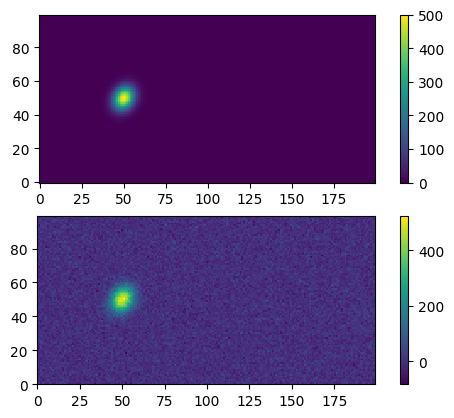

In [115]:
fig, ax = plt.subplots(2, 1)

cb0 = ax[0].imshow(m1_data, origin='lower', interpolation='nearest',
        #    extent=(x.min(), x.max(), y.min(), y.max())
           )

cb1 = ax[1].imshow(m2_data, origin='lower', interpolation='nearest',
           extent=(x.min(), x.max(), y.min(), y.max())
           )
plt.colorbar(cb0, ax=ax[0])
plt.colorbar(cb1, ax=ax[1])
plt.show()

Annulus apperture:
 Aperture: CircularAnnulus
positions: [[50., 50.]]
r_in: 20.0
r_out: 30.0

Phot annulus:
    id  xcenter  ycenter  aperture_sum  aperture_area  aperture_mean
0   1     50.0     50.0      7.331954    1570.796327       0.004668

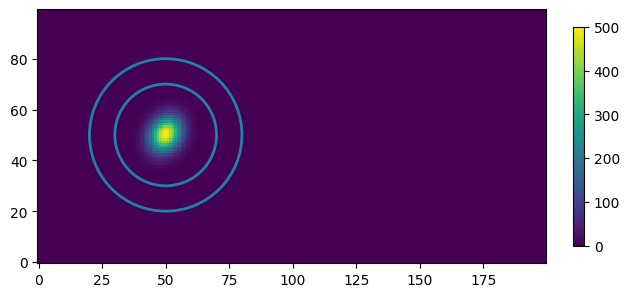

In [116]:
positions = [(m1.x_mean.value, m1.y_mean.value)]

# Annulus aperture
r_in = 20
dr = 10
annulus_aperture = ap.CircularAnnulus(positions, r_in=r_in, r_out=r_in + dr)
phot_annulus = ap.aperture_photometry(m1_data, annulus_aperture)
phot_annulus["aperture_area"] = annulus_aperture.area
phot_annulus["aperture_mean"] = phot_annulus["aperture_sum"] / annulus_aperture.area
print("Annulus apperture:\n", annulus_aperture)
print("Phot annulus:\n", phot_annulus.to_pandas())

fig = plt.figure()
ax = fig.add_subplot(111)

cb = ax.imshow(
    m1_data,
    origin="lower",
    interpolation="nearest",
    # extent=(x.min(), x.max(), y.min(), y.max()),
)
annulus_aperture.plot(color="cyan", lw=2, alpha=0.5)
plt.colorbar(cb, ax=ax, fraction=0.02)
plt.tight_layout()
plt.show()

id  xcenter  ycenter  aperture_sum_0  aperture_sum_1  aperture_sum_2  \
0   1     50.0     50.0     1539.830711     5938.310636     12565.53467   

   aperture_sum_3  aperture_sum_4  aperture_sum_5  aperture_sum_6  \
0    20542.260249      28931.1752    36917.009203    43924.001202   

   aperture_sum_7  aperture_sum_8  aperture_sum_9  aperture_sum_10  \
0    49649.086044    54040.780416    57216.639129     59392.407428   

   aperture_sum_11  aperture_sum_12  aperture_sum_13  aperture_sum_14  \
0     60809.518384     61688.713116     62210.494962     62506.566581   

   aperture_sum_15  aperture_sum_16  
0     62667.837401     62752.174692

[
    3.141592653589793,
    12.566370614359172,
    28.274333882308138,
    50.26548245743669,
    78.53981633974483,
    113.09733552923255,
    153.93804002589985,
    201.06192982974676,
    254.46900494077323,
    314.1592653589793,
    380.132711084365,
    452.3893421169302,
    530.929158456675,
    615.7521601035994,
    706.8583470577034,
    804.247719318987,
    907.9202768874502
]

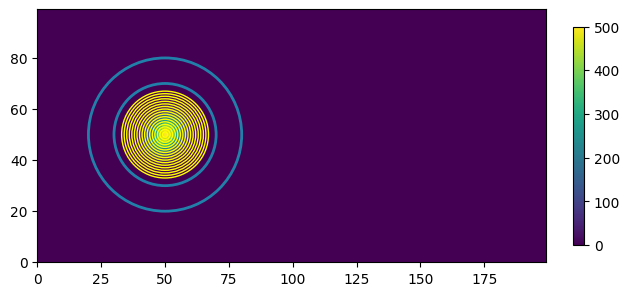

In [117]:
fig = plt.figure()
ax = fig.add_subplot(111)

cb = ax.imshow(m1_data, origin='lower', interpolation='nearest',
              extent=(x.min(), x.max(), y.min(), y.max())
              )
annulus_aperture.plot(color='cyan', lw=2, alpha=0.5)

# Circular aperture
max_rad = 18
apertures = []
for r in np.arange(1, max_rad, 1):
    aperture = ap.CircularAperture(positions, r)
    apertures.append(aperture)
    aperture.plot(color='yellow', lw=1, alpha=1.0)

phot_source = ap.aperture_photometry(m1_data, apertures).to_pandas()
apertures_area = [aperture.area for aperture in apertures]
print(phot_source)
print(apertures_area)

plt.colorbar(cb, ax=ax, fraction=0.02)
plt.tight_layout()
plt.show()

In [118]:
cond = [x.startswith('aperture_sum') for x in phot_source.columns]
phot_columns = phot_source.columns[cond]
phot_columns

Index(['aperture_sum_0', 'aperture_sum_1', 'aperture_sum_2', 'aperture_sum_3',
       'aperture_sum_4', 'aperture_sum_5', 'aperture_sum_6', 'aperture_sum_7',
       'aperture_sum_8', 'aperture_sum_9', 'aperture_sum_10',
       'aperture_sum_11', 'aperture_sum_12', 'aperture_sum_13',
       'aperture_sum_14', 'aperture_sum_15', 'aperture_sum_16'],
      dtype='object')

In [119]:
xs = np.array([aperture.r for aperture in apertures], dtype=float)
ys = phot_source.loc[0, phot_columns].values
print(xs)
print(ys)


[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]

[ 1539.83071149  5938.31063633 12565.53467032 20542.26024922
 28931.17519972 36917.0092032  43924.00120166 49649.08604379
 54040.78041552 57216.63912914 59392.40742763 60809.51838395
 61688.71311569 62210.49496236 62506.56658147 62667.83740071
 62752.1746924 ]

In [120]:
def Gauss_grow(x, a, stddev_x, stddev_y):
    return a * (1.0 - np.exp(-x**2 / (2 * stddev_x * stddev_y)))

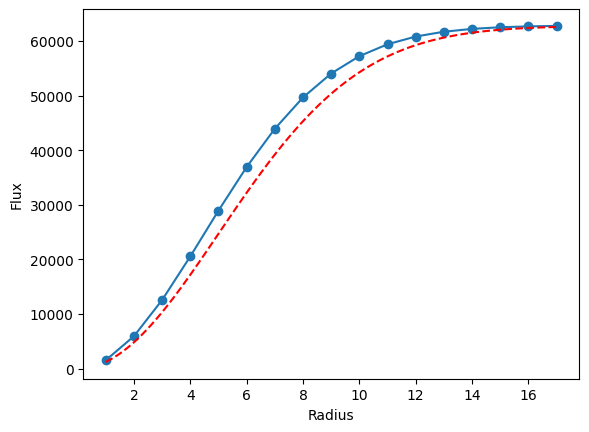

In [121]:
plt.plot(xs, ys, 'o-')

xx = np.linspace(min(radius), max(radius), 100)
a = max(ys)

plt.plot(xx, Gauss_grow(xx, a, m1.x_stddev.value), 'r--')
plt.xlabel('Radius')
plt.ylabel('Flux')
plt.show()